In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import multivariate_normal

# https://stackoverflow.com/questions/18602660/matplotlib-bar3d-clipping-problems
def sph2cart(r, theta, phi):
    '''spherical to Cartesian transformation.'''
    x = r * np.sin(theta) * np.cos(phi)
    y = r * np.sin(theta) * np.sin(phi)
    z = r * np.cos(theta)
    return x, y, z

def sphview(ax):
    '''returns the camera position for 3D axes in spherical coordinates'''
    r = np.square(np.max([ax.get_xlim(), ax.get_ylim()], 1)).sum()
    theta, phi = np.radians((90-ax.elev, ax.azim))
    return r, theta, phi

def ravzip(*itr):
    '''flatten and zip arrays'''
    return zip(*map(np.ravel, itr))

%matplotlib inline

In [2]:
import ROOT
from ROOT import Main
from ROOT import TH1D

f_ubana = ROOT.TFile("./xsec_file_cv.root")
xsec_h = f_ubana.Get("xsec_poly_muangle_mumom_cv")
cov_h = f_ubana.Get("tot_covariance_matrix_poly_muangle_mumom_cv")

Welcome to ROOTaaS 6.06/06


In [3]:
unc_h = TH1D('unc_h', '', 42, 0, 42)
for i in xrange(0, 42):
    unc_h.SetBinContent(i+1, np.sqrt(cov_h.GetBinContent(i+1, i+1)))

In [4]:
bins = [(-1., 0., -0.5, 0.18), (-1., 0.18, -0.5, 0.3), (-1., 0.3, -0.5, 0.45), (-1., 0.45, -0.5, 0.77), (-1., 0.77, -0.5, 2.5), (-0.5, 0., 0., 0.18), (-0.5, 0.18, 0, 0.3), (-0.5, 0.3, 0, 0.45), (-0.5, 0.45, 0, 0.77), (-0.5, 0.77, 0., 2.5), (0., 0., 0.27, 0.18), (0., 0.18, 0.27, 0.3), (0., 0.3, 0.27, 0.45), (0., 0.45, 0.27, 0.77), (0., 0.77, 0.27, 2.5), (0.27, 0., 0.45, 0.3), (0.27, 0.3, 0.45, 0.45), (0.27, 0.45, 0.45, 0.77), (0.27, 0.77, 0.45, 2.5), (0.45, 0., 0.62, 0.3), (0.45, 0.3, 0.62, 0.45), (0.45, 0.45, 0.62, 0.77), (0.45, 0.77, 0.62, 2.5), (0.62, 0., 0.76, 0.3), (0.62, 0.3, 0.76, 0.45), (0.62, 0.45, 0.76, 0.77), (0.62, 0.77, 0.76, 2.5), (0.76, 0., 0.86, 0.3), (0.76, 0.3, 0.86, 0.45), (0.76, 0.45, 0.86, 0.77), (0.76, 0.77, 0.86, 1.28), (0.76, 1.28, 0.86, 2.5), (0.86, 0., 0.94, 0.3), (0.86, 0.3, 0.94, 0.45), (0.86, 0.45, 0.94, 0.77), (0.86, 0.77, 0.94, 1.28), (0.86, 1.28, 0.94, 2.5), (0.94, 0., 1, 0.3), (0.94, 0.3, 1, 0.45), (0.94, 0.45, 1, 0.77), (0.94, 0.77, 1, 1.28), (0.94, 1.28, 1, 2.5)]

h_xpos = np.random.rand(42)
h_ypos = np.random.rand(42)
h_dx = np.random.rand(42)
h_dy = np.random.rand(42)
h_dz1 = np.random.rand(42)
h_dz2 = np.random.rand(42)
h_dz3 = np.random.rand(42)
h_dz4 = np.random.rand(42)

delta = 0.01

for i in xrange(0, 42):
    h_xpos[i] = bins[i][0]
    h_ypos[i] = bins[i][1]
    h_dx[i] = (bins[i][2] - bins[i][0])
    h_dy[i] = (bins[i][3] - bins[i][1])
#     if xsec_h.GetBinContent(i+1) > 0:
    h_dz1[i] = xsec_h.GetBinContent(i+1) - unc_h.GetBinContent(i+1)
    h_dz2[i] = unc_h.GetBinContent(i+1) - delta/2
    h_dz3[i] = delta
    h_dz4[i] = unc_h.GetBinContent(i+1) - delta/2
#     else:
#         h_dz1[i] = xsec_h.GetBinContent(i+1) - unc_h.GetBinContent(i+1)
#         h_dz2[i] = unc_h.GetBinContent(i+1) - delta/2
#         h_dz3[i] = delta
#         h_dz4[i] = unc_h.GetBinContent(i+1) - delta/2

print 'h_xpos',h_xpos
print 'h_dx',h_dx

h_xpos [-1.   -1.   -1.   -1.   -1.   -0.5  -0.5  -0.5  -0.5  -0.5   0.    0.    0.
  0.    0.    0.27  0.27  0.27  0.27  0.45  0.45  0.45  0.45  0.62  0.62
  0.62  0.62  0.76  0.76  0.76  0.76  0.76  0.86  0.86  0.86  0.86  0.86
  0.94  0.94  0.94  0.94  0.94]
h_dx [ 0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.5   0.27  0.27
  0.27  0.27  0.27  0.18  0.18  0.18  0.18  0.17  0.17  0.17  0.17  0.14
  0.14  0.14  0.14  0.1   0.1   0.1   0.1   0.1   0.08  0.08  0.08  0.08
  0.08  0.06  0.06  0.06  0.06  0.06]


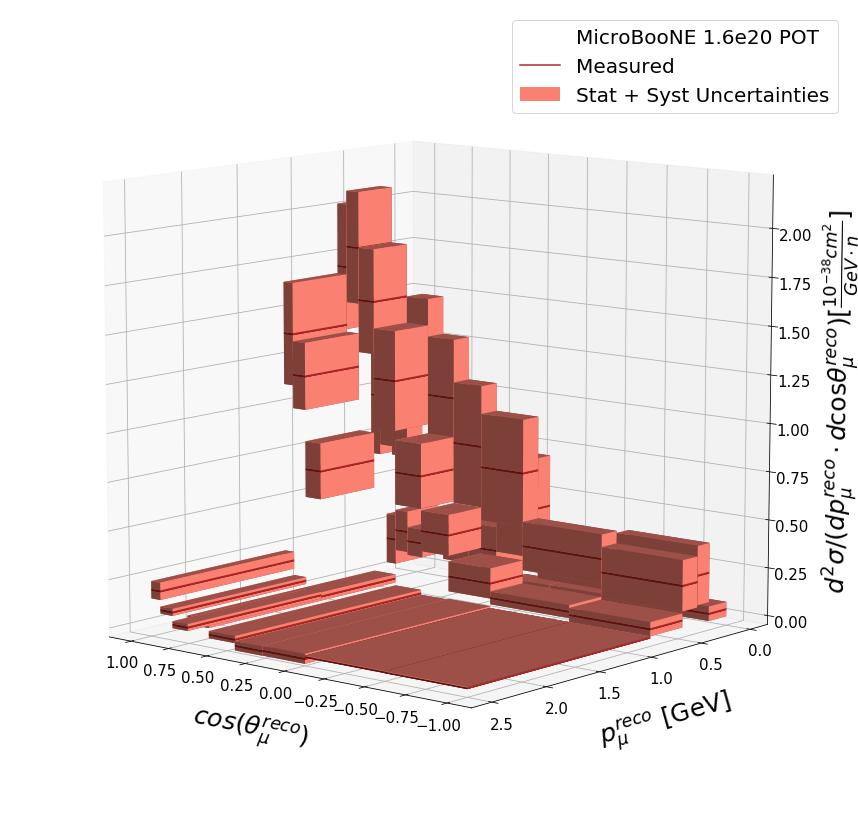

In [39]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10., azim=130) #130 or 90

fig.set_figheight(15)
fig.set_figwidth(15)

xpos = h_xpos
ypos = h_ypos
dx_arr = h_dx
dy_arr = h_dy
dz1_arr = h_dz1
dz2_arr = h_dz2
dz3_arr = h_dz3
dz4_arr = h_dz4

# z position set to zero for firt histograms
zpos1 = np.zeros_like(xpos)

# Set z position to the values of the previous histogram
zpos2 = dz1_arr
zpos3 = zpos2 + dz2_arr
zpos4 = zpos3 + dz3_arr

# Get the camera's location in Cartesian coordinates.
x1, y1, z1 = sph2cart(*sphview(ax))
camera = np.array((x1,y1,0))
# Calculate the distance of each bar from the camera.
#z_order = np.multiply([xpos,ypos, np.zeros_like(xpos)],camera).sum(0)
z_order = xpos*camera[0]+ypos*camera[1]

for i, (x, y, z1, z2, z3, z4, dx, dy, dz1, dz2, dz3, dz4) in enumerate(ravzip(xpos, ypos, zpos1, zpos2, zpos3, zpos4, dx_arr, dy_arr, dz1_arr, dz2_arr, dz3_arr, dz4_arr)):
    pl = ax.bar3d(x, y, z1, dx, dy, dz1, color='w', alpha=0, zsort='max') #, edgecolor='black')
    pl._sort_zpos = z_order[i]
    pl = ax.bar3d(x, y, z2, dx, dy, dz2, color='salmon', alpha=1, zsort='max')
    pl._sort_zpos = z_order[i]
    pl = ax.bar3d(x, y, z3, dx, dy, dz3, color='firebrick', alpha=1, zsort='max')
    pl._sort_zpos = z_order[i]
    pl = ax.bar3d(x, y, z4, dx, dy, dz4, color='salmon', alpha=1, zsort='max')
    pl._sort_zpos = z_order[i]
    
plt.tick_params(labelsize=15)
plt.tick_params(axis='z', pad=7)
ax.set_xlabel(r'$cos(\theta_{\mu}^{reco})$', fontsize=25,fontweight='bold', labelpad=25)
ax.set_ylabel(r'$p_\mu^{reco}$ [GeV]', fontsize=25, labelpad=25)
ax.set_zlabel(r'${d^2\sigma}/{(dp_\mu^{reco}\cdot d\cos{\theta_{\mu}^{reco}})}$[$\frac{10^{-38} cm^2}{GeV \cdot n}$]', fontsize=25, labelpad=25)

ax.set_zlim3d(0, 2.225)


# leg=plt.legend(fontsize=20,loc=1)
# leg_frame=leg.get_frame()
# leg_frame.set_facecolor('white')\
proxy0 = plt.Rectangle((0, 0), 1, 1, fc="w")
proxy1 = plt.axvline(x = 1, color='firebrick')
proxy2 = plt.Rectangle((0, 0), 1, 1, fc="salmon")
ax.legend([proxy0, proxy1,proxy2],['MicroBooNE 1.6e20 POT', 'Measured','Stat + Syst Uncertainties'], fontsize=20,loc=1)

# ax.text(0.95, 0.01, 1, 'colored text in axes coords',
#         verticalalignment='bottom', horizontalalignment='right',
#         transform=ax.transAxes,
#         color='green', fontsize=15)

plt.savefig('3d_xsec.pdf')

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

fig.set_figheight(15)
fig.set_figwidth(15)

x, y = np.random.rand(2, 100) * 4
hist, xedges, yedges = np.histogram2d(x, y, bins=4, range=[[0, 4], [0, 4]])

xpos, ypos = np.meshgrid(xedges[:-1] + 0.25, yedges[:-1] + 0.25)
xpos = xpos.flatten('F')
ypos = ypos.flatten('F')
# z position set to zero
zpos1 = np.zeros_like(xpos)
print xpos
# Construct arrays with the dimensions for the 16 bars.
dx_arr = np.ones_like(zpos)
dy_arr = dx_arr.copy()
dz1_arr = hist.flatten()
# Create a random second histogram
dz2_arr = dz1_arr * np.random.rand(16)
# Set z position to the values of the first histogram
zpos2 = dz1_arr
print dz2_arr
print np.array([1, 2, 3])

# Get the camera's location in Cartesian coordinates.
x1, y1, z1 = sph2cart(*sphview(ax))
camera = np.array((x1,y1,0))
# Calculate the distance of each bar from the camera.
#z_order = np.multiply([xpos,ypos, np.zeros_like(xpos)],camera).sum(0)
z_order = xpos*camera[0]+ypos*camera[1]

for i, (x,y,z1, z2, dx, dy, dz1 ,dz2) in enumerate(ravzip(xpos, ypos, zpos1, zpos2, dx_arr, dy_arr, dz1_arr, dz2_arr)):
    pl = ax.bar3d(x, y, z1, dx, dy, dz1, color='b', zsort='max')
    pl._sort_zpos = z_order[i]
    pl = ax.bar3d(x, y, z2, dx, dy, dz2, color='r', zsort='max')
    pl._sort_zpos = z_order[i]